# Example of pipeline

> Jean-Christophe Taveau - 2024/02/09
> BIP - Deep Learning in Forestry

**Objective**: Count the number of playing cards. This deck is composed of various Clubs, Spades, Hearts and Diamonds.

## 1. Initialisation

### Imports

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage as ski
import scipy as sp
import os

### Read and Display the image

- What can you say about this image? size? type?

In [45]:
path = os.getcwd()
img = ski.io.imread(os.path.join(path,'playing_cards_small.png'))

(-0.5, 1023.5, 731.5, -0.5)

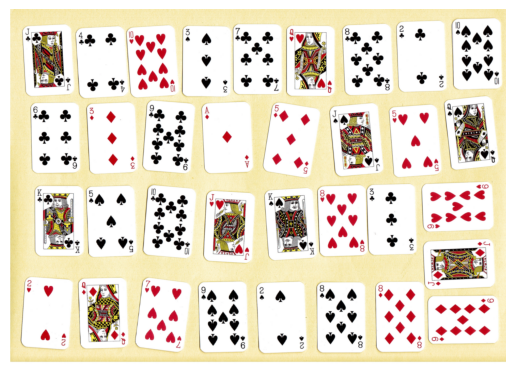

In [46]:
plt.imshow(img)
plt.axis('off')

## 2. Pipeline

### 2.1. Split the R,G, and B channels

(-0.5, 1023.5, 731.5, -0.5)

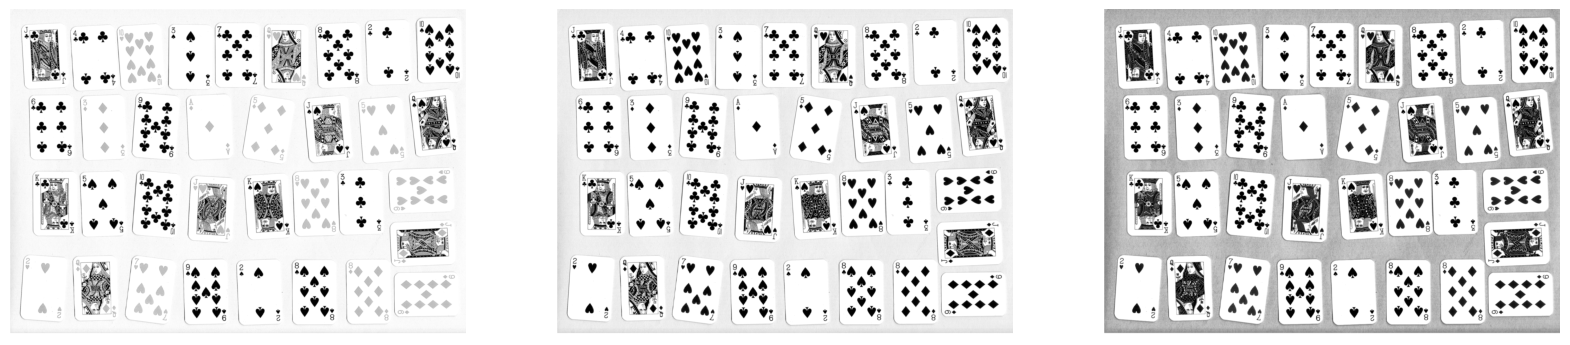

In [47]:
# get rgb channels
red =  img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

fig, ax = plt.subplots(1,3,figsize=(20, 8))
ax[0].imshow(red,cmap='gray')
ax[0].axis('off')
ax[1].imshow(green,cmap='gray')
ax[1].axis('off')
ax[2].imshow(blue,cmap='gray')
ax[2].axis('off')

### 2.2. Extracting the playing cards

- What is the main feature of a playing card?
- What is the color of the background color?

(-0.5, 1023.5, 731.5, -0.5)

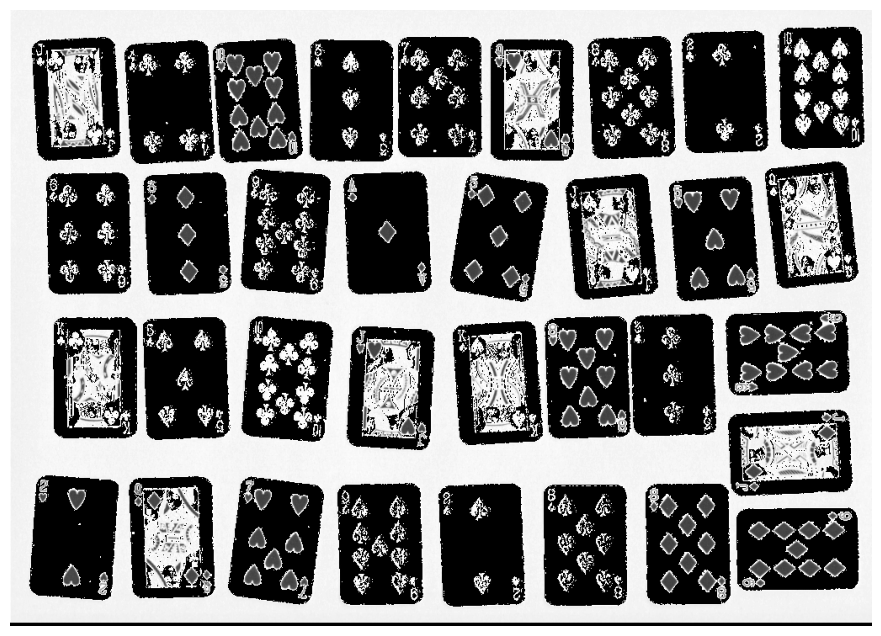

In [64]:
# Extract the red channel
clean = green - red
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(clean,cmap='gray')
ax.axis('off')

### 2.3. Filtering for denoising

In [65]:
fmed = ski.filters.median(clean,ski.morphology.disk(2.0))

### 2.4. Segmentation

In [66]:
thresh = ski.filters.threshold_otsu(fmed)
binary = fmed <= thresh

### 2.5. Mathematical Mophology

- Input: binary Image
- **Basic Operations**: Erosion, Dilation
- **Advanced Operations**: Filling Holes, Skeletonization, Watershed

(-0.5, 1023.5, 731.5, -0.5)

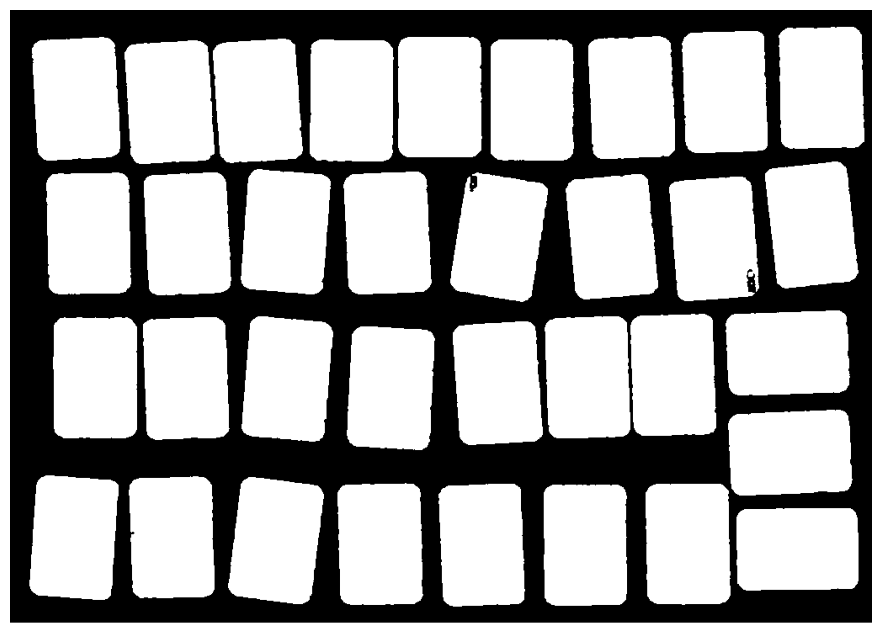

In [67]:
img_fill_holes = sp.ndimage.binary_fill_holes(binary).astype(int)

# Show
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(img_fill_holes,cmap='gray')
ax.axis('off')

### 2.6. Analysis

#### 2.6.1. Region Detection

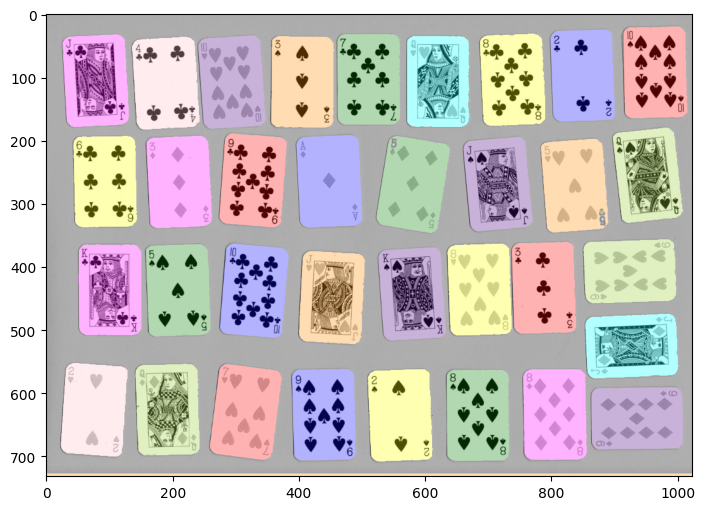

In [68]:
# label image regions
label_image = ski.measure.label(img_fill_holes)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = ski.color.label2rgb(label_image, image=img, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

#### 2.6.2. Region Exploration

In [69]:
regions =  ski.measure.regionprops(label_image)
len(regions)

37

In [70]:
data = ski.measure.regionprops_table(
    label_image,
    properties=('label', 'area'),
)
table = pd.DataFrame(data)
table

,label,area
0,1,13991.0
1,2,13848.0
2,3,13969.0
3,4,14007.0
4,5,13961.0
5,6,13961.0
6,7,13981.0
7,8,13947.0
8,9,14062.0
9,10,13845.0


#### 2.6.3. Region Curation

In [71]:
from skimage.util import map_array

area_threshold = 10000
area_labels = table['label'] * (table['area'] > area_threshold)
new_labels = ski.util.map_array(
        label_image,
        np.asarray(table['label']),
        np.asarray(area_labels),
        )

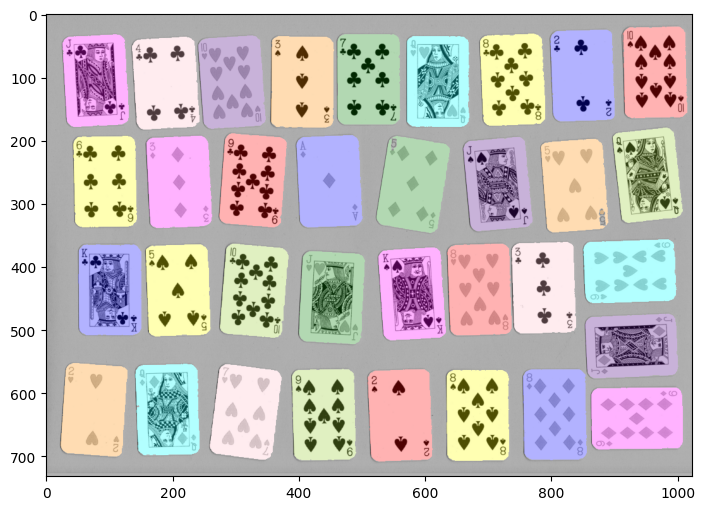

In [72]:
image_newlabel_overlay = ski.color.label2rgb(new_labels, image=img, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_newlabel_overlay)

In [73]:
regions =  ski.measure.regionprops(new_labels)
len(regions)

34

## Correct answer

If you count by hand, you'll find that there is **34 cards**.

## Questions

- How could you improve this pipeline to get the good number of cards?
- How to count the number of red symbols (diamonds and hearts) in the image ? 